In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

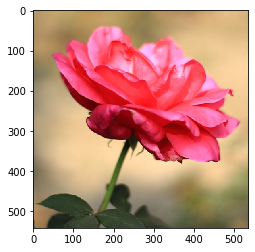

In [2]:
img = cv2.cvtColor(cv2.imread('flower.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
img.shape

(542, 536, 3)

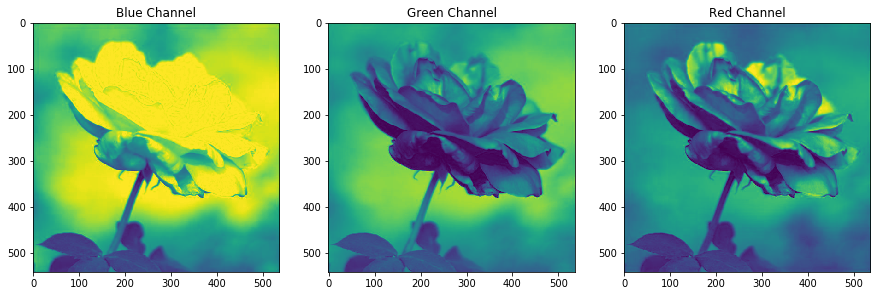

In [5]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")

plt.imshow(blue)
fig.add_subplot(132)

plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)

plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [6]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,526,527,528,529,530,531,532,533,534,535
0,255,246,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,253,255
1,246,175,171,162,174,178,177,179,172,171,...,203,203,201,204,204,203,204,210,197,251
2,255,172,158,165,183,178,172,174,179,177,...,214,212,214,208,208,213,209,207,202,255
3,255,163,162,176,186,178,175,181,177,176,...,213,212,212,206,209,216,208,199,193,255
4,255,173,171,176,174,174,182,187,177,176,...,219,218,212,213,216,218,214,213,204,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,255,96,117,127,150,167,167,167,168,167,...,136,136,135,140,134,136,130,134,124,255
538,255,97,115,124,144,170,167,170,161,160,...,140,140,129,140,131,129,125,122,120,254
539,255,85,93,117,139,157,148,158,160,157,...,136,135,133,136,126,128,122,109,125,255
540,244,94,89,102,113,136,143,163,152,149,...,132,132,129,130,123,126,127,114,127,235


In [7]:
# I will divide all the data of all channels by 255 so that the data is scaled between 0 and 1.

df_blue = blue/255
df_green = green/255
df_red = red/255

In [15]:
# Fit and transform the data in PCA

pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [16]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(542, 50)
(542, 50)
(542, 50)


In [17]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

# nly using 50 components we can keep around 99% of the variance in the data.

Blue Channel : 0.9960251409196784
Green Channel: 0.994320510120221
Red Channel  : 0.9915258390216536


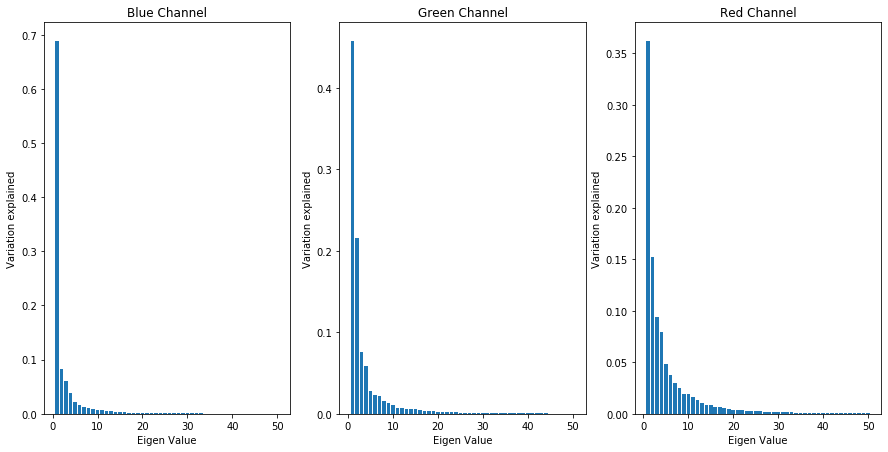

In [18]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [19]:
# Reconstruct the image and visualize

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

print(b_arr.shape, g_arr.shape, r_arr.shape)

(542, 536) (542, 536) (542, 536)


In [20]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))

print(img_reduced.shape)

(542, 536, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


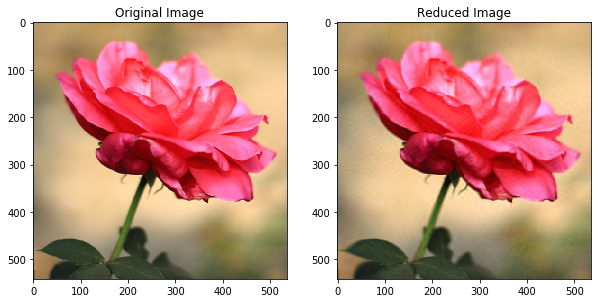

In [21]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()